In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
# Load Iris dataset and select two classes (Setosa and Versicolor)
iris = load_iris()
X = iris.data[iris.target != 2, :4]  # Use all four features, exclude Virginica
y = iris.target[iris.target != 2]    # Binary classification (Setosa=0, Versicolor=1)

In [3]:
# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [4]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [5]:
# Create the Perceptron model
def create_perceptron(learning_rate=0.01):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(4,))
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [6]:
# Train the Perceptron
def train_perceptron(model, X_train, y_train, X_val, y_val, epochs=100):
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=1)
    return history

In [7]:
# Evaluate the Perceptron
def evaluate_perceptron(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nTest Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    predictions = (model.predict(X_test) >= 0.5).astype(int)
    print("\nSample Predictions (First 10 instances):")
    for i in range(10):
        print(f"True: {y_test[i]}, Predicted: {predictions[i][0]}")
    cm = confusion_matrix(y_test, predictions)
    print("\nConfusion Matrix:")
    print(cm)

In [8]:
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

Epoch 1/100


c:\Users\sajee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 0.6194 - loss: 0.6525 - val_accuracy: 0.7500 - val_loss: 0.6067
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6507 - loss: 0.6318 - val_accuracy: 0.7500 - val_loss: 0.5947
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6840 - loss: 0.6250 - val_accuracy: 0.7500 - val_loss: 0.5831
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7063 - loss: 0.6071 - val_accuracy: 0.8000 - val_loss: 0.5718
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7597 - loss: 0.5870 - val_accuracy: 0.8500 - val_loss: 0.5608
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7507 - loss: 0.5971 - val_accuracy: 0.8500 - val_loss: 0.5503
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8035 - loss: 0.5705 - val_accuracy: 0.8500 - val_loss: 0.5399
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8146 - loss: 0.5589 - val_accuracy: 0.9000 - val_loss: 0.5299
Epo

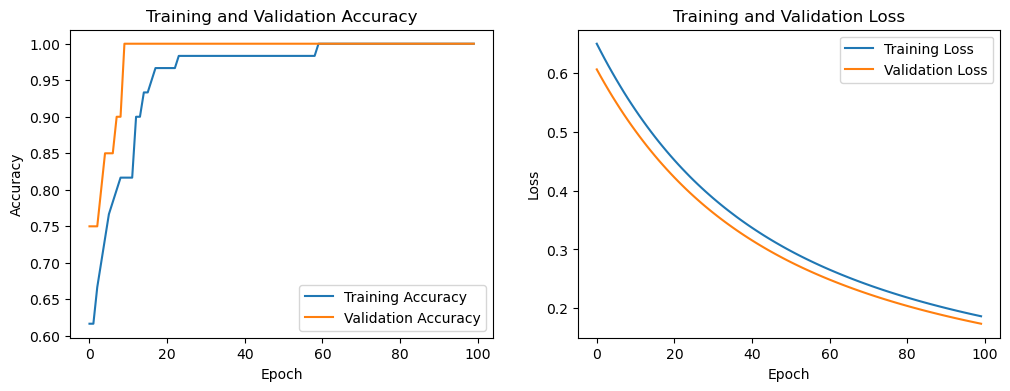

In [9]:
# Execute the pipeline
model = create_perceptron(learning_rate=0.01)
history = train_perceptron(model, X_train, y_train, X_val, y_val, epochs=100)
evaluate_perceptron(model, X_test, y_test)
plot_training_history(history)

In [ ]:
check